### Sélection d'une seule action

In [1]:
import yfinance as yf

In [2]:
import datetime 
INTERVAL = '1d'    
symbol = '^GSPC'      

### Collecte des données

In [3]:
start = "2010-01-01"
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,4273.529785,3472340000
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,4274.509766,3875880000
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,4299.700195,3846230000


(array([278., 373., 185., 144., 240., 455., 123., 176., 177., 268., 141.,
         87.,  71.,  41.,  98., 143., 156., 124., 133.,  47.]),
 array([1022.58001709, 1211.27901917, 1399.97802124, 1588.67702332,
        1777.37602539, 1966.07502747, 2154.77402954, 2343.47303162,
        2532.17203369, 2720.87103577, 2909.57003784, 3098.26903992,
        3286.96804199, 3475.66704407, 3664.36604614, 3853.06504822,
        4041.76405029, 4230.46305237, 4419.16205444, 4607.86105652,
        4796.56005859]),
 <BarContainer object of 20 artists>)

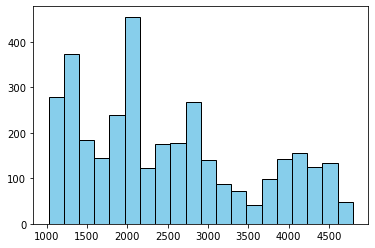

In [5]:
import matplotlib.pyplot as plt

df = data['Close']

# Create a histogram to visualize the data distribution
plt.hist(df, bins=20, color='skyblue', edgecolor='black')

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3.460000e+03
mean,2500.000064,2513.693931,2485.255560,2500.453355,2500.453355,3.940987e+09
std,1047.771525,1054.068980,1041.047711,1047.723837,1047.723837,9.647344e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,1.025000e+09
25%,1633.687500,1643.595032,1627.287476,1633.752502,1633.752502,3.359130e+09
50%,2185.625000,2188.255005,2179.899902,2186.689941,2186.689941,3.778535e+09
75%,3164.490051,3184.817444,3143.049927,3169.085022,3169.085022,4.320378e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.061781e+10


In [7]:
del data["Adj Close"]

<AxesSubplot:>

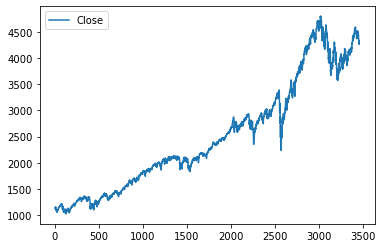

In [8]:
data.plot.line(y="Close", use_index=False)

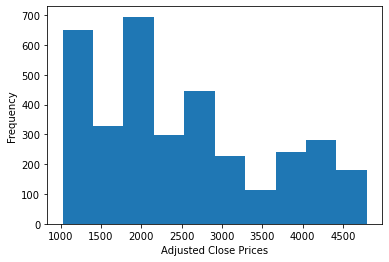

In [9]:
import matplotlib.pyplot as plt

# Histogramme de Adj Close
plt.hist(data['Close'], bins=10)
plt.xlabel('Adjusted Close Prices')
plt.ylabel('Frequency')

plt.show()

<AxesSubplot:title={'center':'Adjusted Close Prices - 200-Day Moving Average'}, xlabel='Date'>

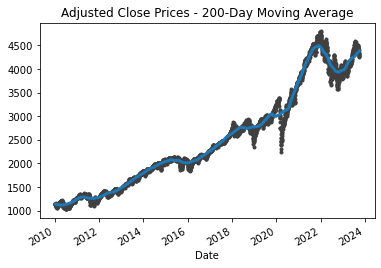

In [10]:
df=data['Close']
moving_average = df.rolling(
    window=200,       
    center=True,      
    min_periods=100,  
).mean()              

ax = df.plot(style=".", color="0.25")
moving_average.plot(
    ax=ax, linewidth=3, title="Adjusted Close Prices - 200-Day Moving Average", legend=False
)


In [11]:
# Calculer la moyenne mobile sur 50 jours
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Calculer le RSI sur 14 jours
change = data['Close'].diff()
gain = change.mask(change < 0, 0)
loss = -change.mask(change > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [12]:
df1=data.dropna()

In [13]:
data=data.dropna()
data

,Open,High,Low,Close,Volume,SMA_50,RSI
Date,,,,,,,
2010-03-16,1150.829956,1160.280029,1150.349976,1159.459961,4369770000,1113.826594,95.395175
2010-03-17,1159.939941,1169.839966,1159.939941,1166.209961,4963200000,1114.490994,99.298813
2010-03-18,1166.130005,1167.770020,1161.160034,1165.829956,4234510000,1115.077192,98.682607
2010-03-19,1166.680054,1169.199951,1155.329956,1159.900024,5212410000,1115.532393,88.286421
2010-03-22,1157.250000,1167.819946,1152.880005,1165.810059,4261680000,1116.014795,88.921808
...,...,...,...,...,...,...,...
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4468.565000,25.527165
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4462.955596,26.686156
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,4457.635195,30.159703


### Entraînement du modèle initial 

In [14]:
test_percentage = 0.2
num_test_samples = int(len(data) * test_percentage)

train = data.iloc[-num_test_samples: ]
test = data.iloc[-num_test_samples:]
predictors=["Open","High","Low",'Volume']

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your time series data here
# data = pd.read_csv('your_dataset.csv')

# Define the number of observations for testing
test_size = 30  # For example, using the last 30 days for testing

# Initialize variables to store best parameters and best error
best_params = None
best_error = float('inf')

# Define the range of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Loop through different parameter combinations
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                errors = []  # To store errors for different test periods
                for i in range(2500, len(data), 50):
                    train_data = data[:i - test_size]  # Training data
                    test_data = data[i - test_size:i]  # Test data
                    # Prepare features and target
                    X_train = train_data[predictors]  # Replace with your features
                    y_train = train_data['Close']  # Replace with your target
                    X_test = test_data[predictors]
                    y_test = test_data['Close']
                    
                    # Create and train the model
                    model = RandomForestRegressor(n_estimators=n_estimators,
                                                  max_depth=max_depth,
                                                  min_samples_split=min_samples_split,
                                                  min_samples_leaf=min_samples_leaf)
                    model.fit(X_train, y_train)
                    
                    # Predict and calculate error
                    y_pred = model.predict(X_test)
                    error = mean_squared_error(y_test, y_pred)
                    errors.append(error)
                
                # Calculate average error for this parameter combination
                avg_error = np.mean(errors)
                
                # Update best_params and best_error if necessary
                if avg_error < best_error:
                    best_error = avg_error
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }




KeyboardInterrupt: 

In [15]:
best_error=70.0682
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_error)

NameError: name 'best_params' is not defined

In [16]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor(n_estimators=200, max_depth= None, min_samples_split= 2, min_samples_leaf= 1)
model.fit(train[predictors],train['Close'])

RandomForestRegressor(n_estimators=200)

In [17]:
preds=model.predict(test[predictors])

In [18]:
from sklearn import metrics
import numpy as np

print("Mean Absolute Error:", round(metrics.mean_absolute_error(test["Close"], preds), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(test["Close"], preds), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(test["Close"], preds)), 4))
errors = abs(preds - test["Close"])
mape = 100 * (errors / test["Close"])
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5.8945
Mean Squared Error: 64.5817
Root Mean Squared Error: 8.0363
Accuracy: 99.86 %.


In [19]:
import pandas as pd
preds= pd.Series(preds, index=test.index,name="Predictions")
combined=pd.concat([test["Close"],preds],axis=1)

<AxesSubplot:xlabel='Date'>

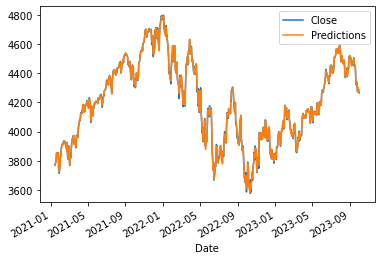

In [20]:
combined.plot()

In [21]:
combined

,Close,Predictions
Date,,
2021-01-15,3768.250000,3772.629796
2021-01-19,3798.909912,3798.607449
2021-01-20,3851.850098,3851.228065
2021-01-21,3853.070068,3854.336401
2021-01-22,3841.469971,3844.343579
...,...,...
2023-09-26,4273.529785,4277.620015
2023-09-27,4274.509766,4271.900464
2023-09-28,4299.700195,4297.685901


In [22]:
combined['residuals'] = combined['Close'] - combined['Predictions']

high_risk_threshold = 3.0
moderate_risk_threshold = 2
low_risk_threshold = 1.0

def categorize_risk(residual):
    if abs(residual) > high_risk_threshold:
        return 'Very Risky'
    elif abs(residual) > moderate_risk_threshold:
        return 'Risky'
    elif abs(residual) > low_risk_threshold:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

combined['Risk Level'] = combined['residuals'].apply(categorize_risk)

combined.tail(8)

,Close,Predictions,residuals,Risk Level
Date,,,,
2023-09-21,4330.000000,4339.118267,-9.118267,Very Risky
2023-09-22,4320.060059,4327.093818,-7.033760,Very Risky
2023-09-25,4337.439941,4335.089924,2.350017,Risky
2023-09-26,4273.529785,4277.620015,-4.090229,Very Risky
2023-09-27,4274.509766,4271.900464,2.609302,Risky
2023-09-28,4299.700195,4297.685901,2.014294,Risky
2023-09-29,4288.049805,4291.785032,-3.735227,Very Risky
2023-10-02,4263.640137,4269.704536,-6.064399,Very Risky


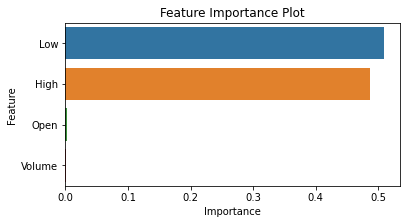

In [24]:
# Get feature importances
feature_importances = model.feature_importances_
import seaborn as sns

# Create a DataFrame to store feature names and importances
feature_df = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Create the feature importance plot
plt.figure(figsize=(6, 3))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Entraînement du modèle initial en appliquant le Backtest

In [25]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Close"])
    preds=model.predict(test[predictors])
    preds= pd.Series(preds, index=test.index,name="Predictions")
    combined=pd.concat([test["Close"],preds],axis=1)
    return combined

In [26]:
def backtest(data,model,predictors,start=500,step=50):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [27]:
preds=backtest(data,model,predictors,100,10)

In [28]:
from sklearn import metrics
import numpy as np

print("Mean Absolute Error with Backtest:", round(metrics.mean_absolute_error(preds["Close"],preds["Predictions"]), 4))
print("Mean Squared Error with Backtest:", round(metrics.mean_squared_error(preds["Close"],preds["Predictions"]), 4))
print("Root Mean Squared Error with Backtest:", round(np.sqrt(metrics.mean_squared_error(preds["Close"],preds["Predictions"])), 4))
errors = abs(preds["Close"]-preds["Predictions"])
mape = 100 * (errors / preds["Close"])
accuracy = 100 - np.mean(mape)
print('Accuracy with Backtest:', round(accuracy, 2), '%.') 

Mean Absolute Error with Backtest: 14.1196
Mean Squared Error with Backtest: 507.1741
Root Mean Squared Error with Backtest: 22.5205
Accuracy with Backtest: 99.46 %.


<AxesSubplot:xlabel='Date'>

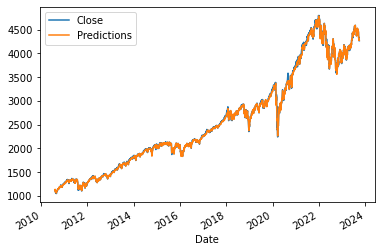

In [29]:
preds.plot()

In [30]:
preds['residuals'] = preds['Close'] - preds['Predictions']

high_risk_threshold =15
moderate_risk_threshold = 20
low_risk_threshold = 10

def categorize_risk(residual):
    if abs(residual) > high_risk_threshold:
        return 'Very Risky'
    elif abs(residual) > moderate_risk_threshold:
        return 'Risky'
    elif abs(residual) > low_risk_threshold:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

preds['Risk Level'] = preds['residuals'].apply(categorize_risk)

preds

,Close,Predictions,residuals,Risk Level
Date,,,,
2010-08-06,1121.640015,1118.178493,3.461522,Low Risk
2010-08-09,1127.790039,1134.124010,-6.333971,Low Risk
2010-08-10,1121.060059,1122.050932,-0.990873,Low Risk
2010-08-11,1089.469971,1103.570925,-14.100955,Moderate Risk
2010-08-12,1083.609985,1085.352795,-1.742810,Low Risk
...,...,...,...,...
2023-09-26,4273.529785,4283.515178,-9.985393,Low Risk
2023-09-27,4274.509766,4272.117615,2.392151,Low Risk
2023-09-28,4299.700195,4299.589468,0.110728,Low Risk


### Entraînement du modèle avec le Backtest et la création des caractéristiques

In [31]:
horizons = [2,5,60]
new_predictors = predictors.copy()

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Close"]
    
    new_predictors+= [trend_column]   

# Calculate 7-day moving averages
data['7_day_avg'] = data['Close'].rolling(window=7).mean()

# Calculate daily variations
data['daily_variation'] = data['Close'].diff()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

new_predictors+=['7_day_avg','daily_variation','SMA_50']

<ipython-input-31-da2101e94b31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[trend_column] = data.shift(1).rolling(horizon).sum()["Close"]
<ipython-input-31-da2101e94b31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[trend_column] = data.shift(1).rolling(horizon).sum()["Close"]
<ipython-input-31-da2101e94b31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [32]:
data=data.dropna()

In [33]:
data

,Open,High,Low,Close,Volume,SMA_50,RSI,Trend_2,Trend_5,Trend_60,7_day_avg,daily_variation
Date,,,,,,,,,,,,
2010-06-10,1058.770020,1087.849976,1058.770020,1086.839966,5144780000,1148.122197,53.210117,2117.689941,5335.869873,69157.179810,1074.441406,31.150024
2010-06-11,1082.650024,1092.250000,1077.119995,1091.599976,4059280000,1146.565596,50.864324,2142.529907,5319.879883,69084.559814,1073.472831,4.760010
2010-06-14,1095.000000,1105.910034,1089.030029,1089.630005,4425830000,1144.796196,53.731542,2178.439941,5346.599854,69009.949829,1071.587123,-1.969971
2010-06-15,1091.209961,1115.589966,1091.209961,1115.229980,4644490000,1143.351997,58.606980,2181.229980,5385.759888,68933.749878,1078.779977,25.599976
2010-06-16,1114.020020,1118.739990,1107.130005,1114.609985,5002600000,1141.855398,59.975198,2204.859985,5438.989868,68889.079834,1087.942836,-0.619995
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4468.565000,25.527165,8657.500000,21833.650391,268177.249512,4365.815709,-63.910156
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4462.955596,26.686156,8610.969727,21663.229980,268000.399414,4340.241420,0.979980
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,4457.635195,30.159703,8548.039551,21535.539551,267819.319336,4319.634277,25.190430


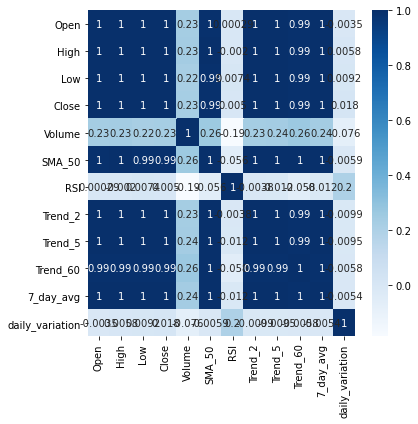

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6,6))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")

plt.show()

In [35]:
predictions = backtest(data, model, new_predictors,100,10)

<AxesSubplot:xlabel='Date'>

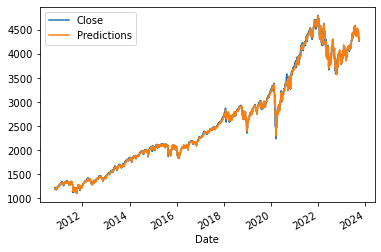

In [36]:
predictions.plot()

In [37]:
from sklearn import metrics
import numpy as np

print("Mean Absolute Error with Backtest:", round(metrics.mean_absolute_error(predictions["Close"],predictions["Predictions"]), 4))
print("Mean Squared Error with Backtest:", round(metrics.mean_squared_error(predictions["Close"],predictions["Predictions"]), 4))
print("Root Mean Squared Error with Backtest:", round(np.sqrt(metrics.mean_squared_error(predictions["Close"],predictions["Predictions"])), 4))
errors = abs(predictions["Close"]-predictions["Predictions"])
mape = 100 * (errors / predictions["Close"])
accuracy = 100 - np.mean(mape)
print('Accuracy with Backtest:', round(accuracy, 2), '%.') 

Mean Absolute Error with Backtest: 14.1497
Mean Squared Error with Backtest: 518.9594
Root Mean Squared Error with Backtest: 22.7807
Accuracy with Backtest: 99.46 %.


In [ ]:
# Get feature importances
feature_importances = model.feature_importances_
import seaborn as sns

# Create a DataFrame to store feature names and importances
feature_df = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Create the feature importance plot
plt.figure(figsize=(6, 3))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
predictions['residuals'] = predictions['Close'] - predictions['Predictions']

high_risk_threshold = 15
moderate_risk_threshold = 10
low_risk_threshold = 20

def categorize_risk(residual):
    if abs(residual) > high_risk_threshold:
        return 'Very Risky'
    elif abs(residual) > moderate_risk_threshold:
        return 'Risky'
    elif abs(residual) > low_risk_threshold:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

predictions['Risk Level'] = predictions['residuals'].apply(categorize_risk)

predictions

In [ ]:
predictions[predictions['Risk Level']=='Moderate Risk'].count()